In [1]:
import pandas as pd
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
brand=[]
inch=[]
price=[]
rating=[]
no_of_ratings= []
no_of_reviews = []
hd_type=[]
off_price=[]
exc_price=[]
mfyy=[]
mfyy2=[]

In [90]:

for page in range(1, 20):
    url = f"https://www.flipkart.com/search?q=smart+tvs&page={page}"
    df = requests.get(url)
    soup1 = BeautifulSoup(df.text, "html.parser")

    # Extract details for each TV
    products = soup1.find_all("div", class_="KzDlHZ")  # Get all product containers

    for product in products:
        tv_name = product.text.strip()
        
        if "Ultra HD" in tv_name:
            hd_type.append("Ultra HD")
        elif "HD Ready" in tv_name:
            hd_type.append("HD Ready")
        else:
            hd_type.append("Full HD")
        
        # BRAND
        brand_match = re.findall(r"^\w+", tv_name)
        brand.append(brand_match[0] if brand_match else np.nan)
        
            
        # INCH
        inch_match = re.findall(r"(\d+\.?\d*\s*)inch", tv_name)
        inch.append(inch_match[0] if inch_match else np.nan)


        # offer 
        off = product.find_next("div", class_="UkUFwK")
        off_price.append(off.text.strip() if off else np.nan)


        # exc 
        exc = product.find_next("div", class_="M4DNwV")
        exc_price.append(exc.text.strip() if exc else np.nan)


        
        # PRICE
        price_tag = product.find_next("div", class_="Nx9bqj _4b5DiR")
        price.append(price_tag.text.strip() if price_tag else np.nan)

        # mfy
        mfy = product.find_next("li", class_="J+igdf")
        mfyy.append(mfy.text.strip() if mfy else np.nan)

        # RATING
        rating_tag = product.find_next("div", class_="XQDdHH")
        rating.append(rating_tag.text.strip() if rating_tag else np.nan)

        # NO OF RATINGS
        rating_count_tag = product.find_next("span", class_="Wphh3N")
        if rating_count_tag:
            rating_match = re.findall(r"(\d.*)\sRatings", rating_count_tag.text)
            no_of_ratings.append(rating_match[0] if rating_match else np.nan)
        else:
            no_of_ratings.append(np.nan)

        # NO OF REVIEWS
        review_match = re.findall(r"(\d+)\sReviews", rating_count_tag.text) if rating_count_tag else []
        no_of_reviews.append(review_match[0] if review_match else np.nan)

In [93]:
print(brand[1:5])
print(inch[1:5])
print(price[1:5])
print(rating[1:5])
print(no_of_ratings[1:5])
print(no_of_reviews[1:5])
print(hd_type[1:5])
print(off_price[1:5])
print(exc_price[1:5])
print(mfyy[1:5])

['InnoQ', 'REDMI', 'Mi', 'InnoQ']
['43 ', '32 ', '32 ', '24 ']
['₹12,990', '₹11,399', '₹12,490', '₹6,190']
['4', '4.2', '4.3', '4']
['3,780', '12,095', '1,78,956', '3,780']
['435', '747', '729', '435']
['Full HD', 'HD Ready', 'HD Ready', 'HD Ready']
['67% off', '54% off', '50% off', '73% off']
['Bank Offer', 'Hot Deal', 'Hot Deal', 'Bank Offer']
['Operating System: Android', 'Operating System: FireTv OS 7', 'Operating System: Google TV', 'Operating System: Android']


In [95]:
print(len(brand))
print(len(inch))
print(len(price))
print(len(rating))
print(len(no_of_ratings))
print(len(no_of_reviews))
print(len(hd_type))
print(len(off_price))
print(len(exc_price))
print(len(mfyy))

456
456
456
456
456
456
456
456
456
456


In [215]:
import pandas as pd

df=pd.DataFrame({"Brand":brand,"Inch's":inch,"Price":price,"Rating":rating,"NO Of Ratings":no_of_ratings,"NO Of Reviews":no_of_reviews,"HD Type":hd_type,"%off":off_price,"Extra Offers":exc_price,"Operating System":mfyy})

In [217]:
df.head(5)

Brand Inch's    Price Rating NO Of Ratings NO Of Reviews   HD Type  \
0  Reliance    24    ₹6,499    4.2            11             2  HD Ready   
1     InnoQ    43   ₹12,990      4         3,780           435   Full HD   
2     REDMI    32   ₹11,399    4.2        12,095           747  HD Ready   
3        Mi    32   ₹12,490    4.3      1,78,956           729  HD Ready   
4     InnoQ    24    ₹6,190      4         3,780           435  HD Ready   

      %off Extra Offers               Operating System  
0  56% off   Bank Offer      Operating System: Android  
1  67% off   Bank Offer      Operating System: Android  
2  54% off     Hot Deal  Operating System: FireTv OS 7  
3  50% off     Hot Deal    Operating System: Google TV  
4  73% off   Bank Offer      Operating System: Android

In [249]:
df.columns

Index(['Brand', 'Inch's', 'Price', 'Rating', 'NO Of Ratings', 'NO Of Reviews',
       'HD Type', '%off', 'Extra Offers', 'Operating System'],
      dtype='object')

In [251]:
df.index

RangeIndex(start=0, stop=456, step=1)

In [219]:
df.shape

(456, 10)

In [243]:
df.describe()

Inch's         Price  NO Of Ratings  NO Of Reviews        %off
count  456.000000  4.560000e+02     456.000000     456.000000  456.000000
mean    47.936404  5.579527e+04     321.100877     323.184211   45.690789
std     13.303982  4.682927e+05     178.517727     293.589631   11.487920
min     24.000000  5.999000e+03       1.000000       0.000000    1.000000
25%     40.000000  1.544225e+04     321.000000      80.000000   36.000000
50%     43.000000  2.699000e+04     321.000000     236.000000   44.000000
75%     55.000000  3.899225e+04     321.000000     482.500000   55.000000
max    115.000000  9.999990e+06     886.000000     965.000000   79.000000

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             456 non-null    object
 1   Inch's            456 non-null    int32 
 2   Price             456 non-null    int32 
 3   Rating            456 non-null    object
 4   NO Of Ratings     456 non-null    int32 
 5   NO Of Reviews     456 non-null    int32 
 6   HD Type           456 non-null    object
 7   %off              456 non-null    int32 
 8   Extra Offers      456 non-null    object
 9   Operating System  456 non-null    object
dtypes: int32(5), object(5)
memory usage: 26.8+ KB


In [247]:
df.sample(5)

Brand  Inch's  Price Rating  NO Of Ratings  NO Of Reviews   HD Type  \
66      TCL      55  32990    4.1            321            348  Ultra HD   
81   Sansui      32   9982    4.2             67              8  HD Ready   
293    Acer      32  12999      4            321            552  HD Ready   
366  Sansui      65  52199    4.2            728            106  Ultra HD   
76      TCL      50  28490    4.1            321            317  Ultra HD   

     %off                 Extra Offers Operating System  
66     58                     Hot Deal        Google TV  
81     50                   Bank Offer          Coolita  
293    45                     Hot Deal        Google TV  
366    34  Upto ₹8,400 Off on Exchange        Google TV  
76     56                     Hot Deal        Google TV

In [221]:
df.to_csv("smart_TV'S_data.csv", index=False)

In [122]:
df=pd.read_csv("smart_TV'S_data.csv")

In [124]:
df

Brand  Inch's    Price  Rating NO Of Ratings  NO Of Reviews   HD Type  \
0    Reliance    24.0   ₹6,499     4.2            11            2.0  HD Ready   
1       InnoQ    43.0  ₹12,990     4.0         3,780          435.0   Full HD   
2       REDMI    32.0  ₹11,399     4.2        12,095          747.0  HD Ready   
3          Mi    32.0  ₹12,490     4.3      1,78,956          729.0  HD Ready   
4       InnoQ    24.0   ₹6,190     4.0         3,780          435.0  HD Ready   
..        ...     ...      ...     ...           ...            ...       ...   
451    Sansui    70.0  ₹65,699     4.2         2,612          236.0  Ultra HD   
452   TOSHIBA    43.0  ₹18,999     4.3         1,081          147.0   Full HD   
453   SAMSUNG    32.0  ₹15,499     3.9           115           10.0  HD Ready   
454        Mi    55.0  ₹36,019     4.3      1,25,542          418.0  Ultra HD   
455        Mi    50.0  ₹26,999     4.3      1,25,542          418.0  Ultra HD   

        %off                 Extra Offers                 Operating System  
0    56% off                   Bank Offer        Operating System: Android  
1    67% off                   Bank Offer        Operating System: Android  
2    54% off                     Hot Deal    Operating System: FireTv OS 7  
3    50% off                     Hot Deal      Operating System: Google TV  
4    73% off                   Bank Offer        Operating System: Android  
..       ...                          ...                              ...  
451  32% off  Upto ₹8,400 Off on Exchange      Operating System: Google TV  
452  45% off                     Hot Deal        Operating System: Android  
453  33% off                   Bank Offer          Operating System: Tizen  
454  27% off  Upto ₹5,400 Off on Exchange  Operating System: Android Based  
455  35% off                     Hot Deal        Operating System: Android  

[456 rows x 10 columns]

In [126]:
df.dtypes

Brand                object
Inch's              float64
Price                object
Rating              float64
NO Of Ratings        object
NO Of Reviews       float64
HD Type              object
%off                 object
Extra Offers         object
Operating System     object
dtype: object

In [128]:
df.isnull().sum()

Brand               0
Inch's              5
Price               0
Rating              0
NO Of Ratings       3
NO Of Reviews       3
HD Type             0
%off                0
Extra Offers        0
Operating System    0
dtype: int64

In [130]:
df["NO Of Reviews"] = pd.to_numeric(df["NO Of Reviews"], errors="coerce")  # Convert to numeric, set errors to NaN if non-numeric
df["NO Of Reviews"].fillna(df["NO Of Reviews"].mean(), inplace=True)  # Fill NaNs with mean
df["NO Of Reviews"] = df["NO Of Reviews"].astype("int")  # Convert safely to int

In [132]:
df["NO Of Ratings"] = pd.to_numeric(df["NO Of Ratings"], errors="coerce")  # Convert to numeric, set errors to NaN if non-numeric
df["NO Of Ratings"].fillna(df["NO Of Ratings"].mean(), inplace=True)  # Fill NaNs with mean
df["NO Of Ratings"] = df["NO Of Ratings"].astype("int")  # Convert safely to int

In [134]:
df["Inch's"] = pd.to_numeric(df["Inch's"], errors="coerce")  # Convert to numeric, set errors to NaN if non-numeric
df["Inch's"].fillna(df["Inch's"].mean(), inplace=True)  # Fill NaNs with mean
df["Inch's"] = df["Inch's"].astype("int")  # Convert safely to int

In [136]:
df["Price"] = df["Price"].str.replace("₹", "", regex=True)  # Remove ₹ symbol
df["Price"] = df["Price"].str.replace(",", "", regex=True)  # Remove commas
df["Price"] = df["Price"].astype(int)  # Convert to integer

In [138]:
df["%off"] = df["%off"].str.replace("% off","",regex=True)
df["%off"] = df["%off"].astype(int)

In [140]:
df["Operating System"] = df["Operating System"].str.replace("Operating System: ","",regex=True) 

In [142]:
df.dtypes

Brand                object
Inch's                int32
Price                 int32
Rating              float64
NO Of Ratings         int32
NO Of Reviews         int32
HD Type              object
%off                  int32
Extra Offers         object
Operating System     object
dtype: object

In [144]:
df.head(5)

Brand  Inch's  Price  Rating  NO Of Ratings  NO Of Reviews   HD Type  \
0  Reliance      24   6499     4.2             11              2  HD Ready   
1     InnoQ      43  12990     4.0            321            435   Full HD   
2     REDMI      32  11399     4.2            321            747  HD Ready   
3        Mi      32  12490     4.3            321            729  HD Ready   
4     InnoQ      24   6190     4.0            321            435  HD Ready   

   %off Extra Offers Operating System  
0    56   Bank Offer          Android  
1    67   Bank Offer          Android  
2    54     Hot Deal      FireTv OS 7  
3    50     Hot Deal        Google TV  
4    73   Bank Offer          Android

In [146]:
df.isnull().sum()

Brand               0
Inch's              0
Price               0
Rating              0
NO Of Ratings       0
NO Of Reviews       0
HD Type             0
%off                0
Extra Offers        0
Operating System    0
dtype: int64

In [148]:
df["Brand"].value_counts()

Brand
Sansui       99
TCL          72
REDMI        22
Acer         22
SAMSUNG      22
Hisense      20
TOSHIBA      19
Mi           15
Thomson      14
KODAK        12
Reliance     10
iFFALCON     10
LG           10
Blaupunkt     9
SONY          8
Haier         8
Foxsky        7
MOTOROLA      7
Coocaa        6
InnoQ         6
realme        6
Vu            5
IMPEX         5
Infinix       5
BPL           4
acerpure      4
Admiral       4
MarQ          3
Daiwa         3
CANDY         3
Aiwa          2
ONIDA         2
HUIDI         2
Lloyd         2
Panasonic     1
Dor           1
T             1
NOAX          1
PHILIPS       1
Oxygen        1
Salora        1
NU            1
Name: count, dtype: int64

In [150]:
df["Operating System"].value_counts()

Operating System
Google TV                           291
Android                              44
FireTv OS 7                          22
Coolita                              22
Tizen                                21
WebOS                                16
Linux                                14
VIDAA                                12
Android Based                         6
HD Ready 1366 × 768 Pixels            2
Ultra HD (4K) 3840*2160 Pixels        2
Ultra HD (4K) 3840 x 2160 Pixels      2
Dor OS                                1
Linux based                           1
Name: count, dtype: int64

In [152]:
df["Operating System"] = df["Operating System"].replace([
    "HD Ready 1366 × 768 Pixels", 
    "Ultra HD (4K) 3840*2160 Pixels", 
    "Ultra HD (4K) 3840 x 2160 Pixels"
], np.nan)  
df.dropna(subset=["Operating System"], inplace=True) 

In [154]:
df["Operating System"].value_counts()

Operating System
Google TV        291
Android           44
FireTv OS 7       22
Coolita           22
Tizen             21
WebOS             16
Linux             14
VIDAA             12
Android Based      6
Dor OS             1
Linux based        1
Name: count, dtype: int64

In [156]:
df["HD Type"].value_counts()

HD Type
Ultra HD    289
HD Ready    104
Full HD      57
Name: count, dtype: int64

In [158]:
df["Extra Offers"].value_counts()

Extra Offers
Hot Deal                        218
Bank Offer                       76
Save extra with combo offers     56
Upto ₹8,400 Off on Exchange      36
Upto ₹5,400 Off on Exchange      28
Upto ₹7,900 Off on Exchange      14
Lowest price in the year          7
Only few left                     7
Lowest price since launch         7
Only 3 left                       1
Name: count, dtype: int64

In [160]:
df.dtypes

Brand                object
Inch's                int32
Price                 int32
Rating              float64
NO Of Ratings         int32
NO Of Reviews         int32
HD Type              object
%off                  int32
Extra Offers         object
Operating System     object
dtype: object

<Axes: xlabel='Extra Offers'>

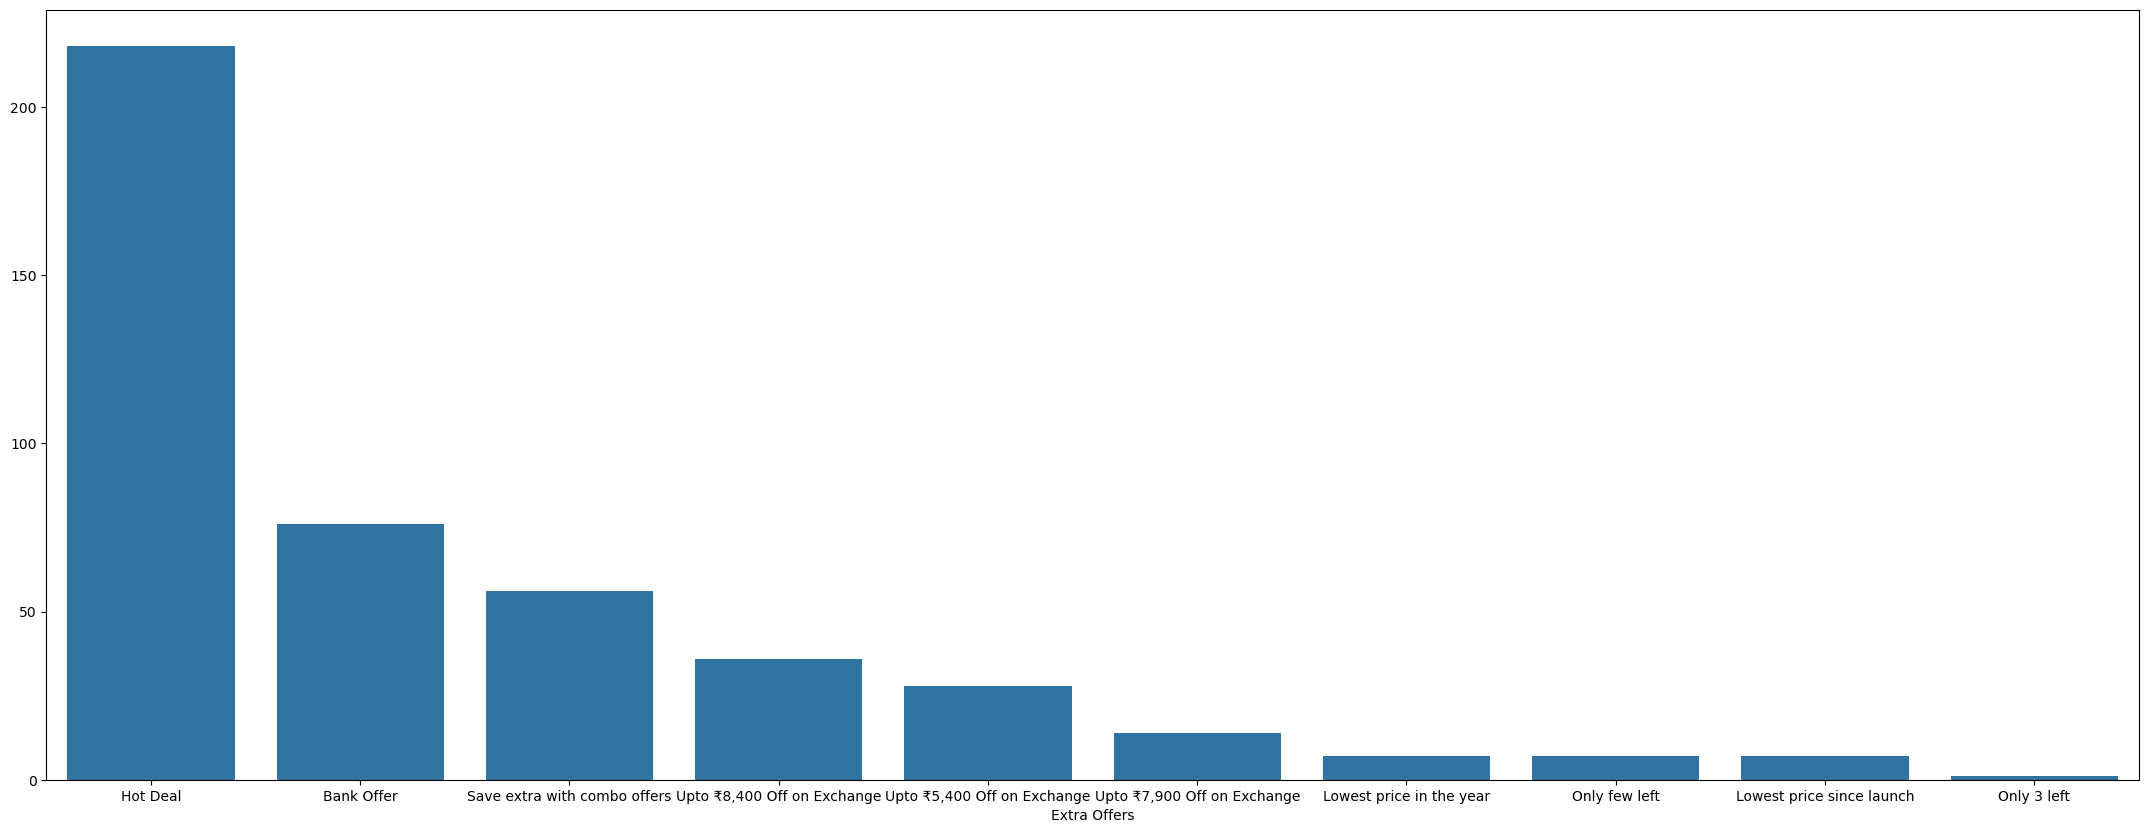

In [162]:
plt.figure(figsize=(27,10))
sns.barplot(x=df["Extra Offers"].value_counts().index,y=df["Extra Offers"].value_counts().values)

<Axes: xlabel='HD Type'>

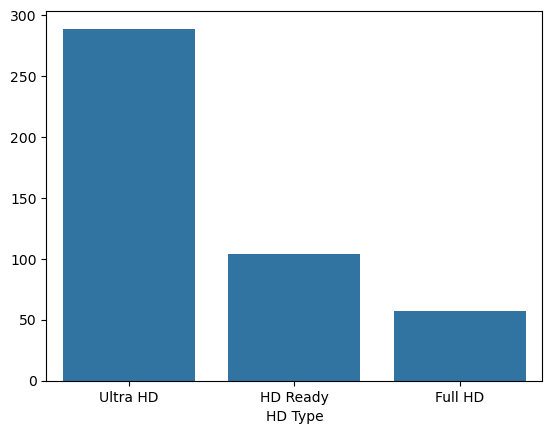

In [164]:
sns.barplot(x=df['HD Type'].value_counts().index,y=df["HD Type"].value_counts().values)

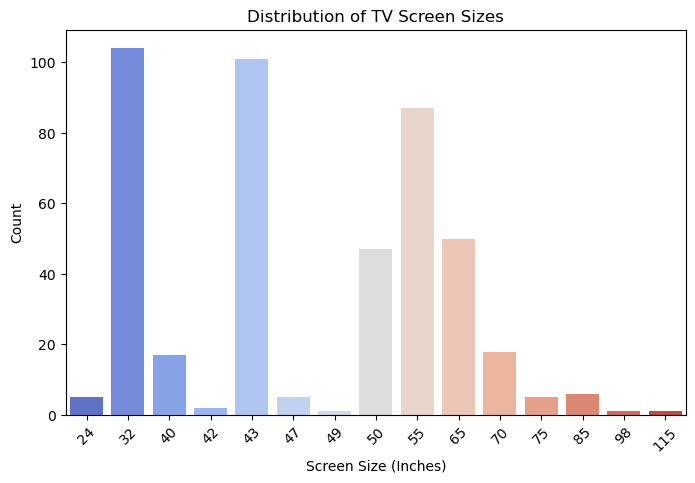

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

barplt_inches = df["Inch's"].value_counts().sort_values().reset_index()
barplt_inches.columns = ["Inch's", "Count"]  

plt.figure(figsize=(8, 5))
sns.barplot(x="Inch's", y="Count", data=barplt_inches, palette="coolwarm")
plt.title("Distribution of TV Screen Sizes")
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()


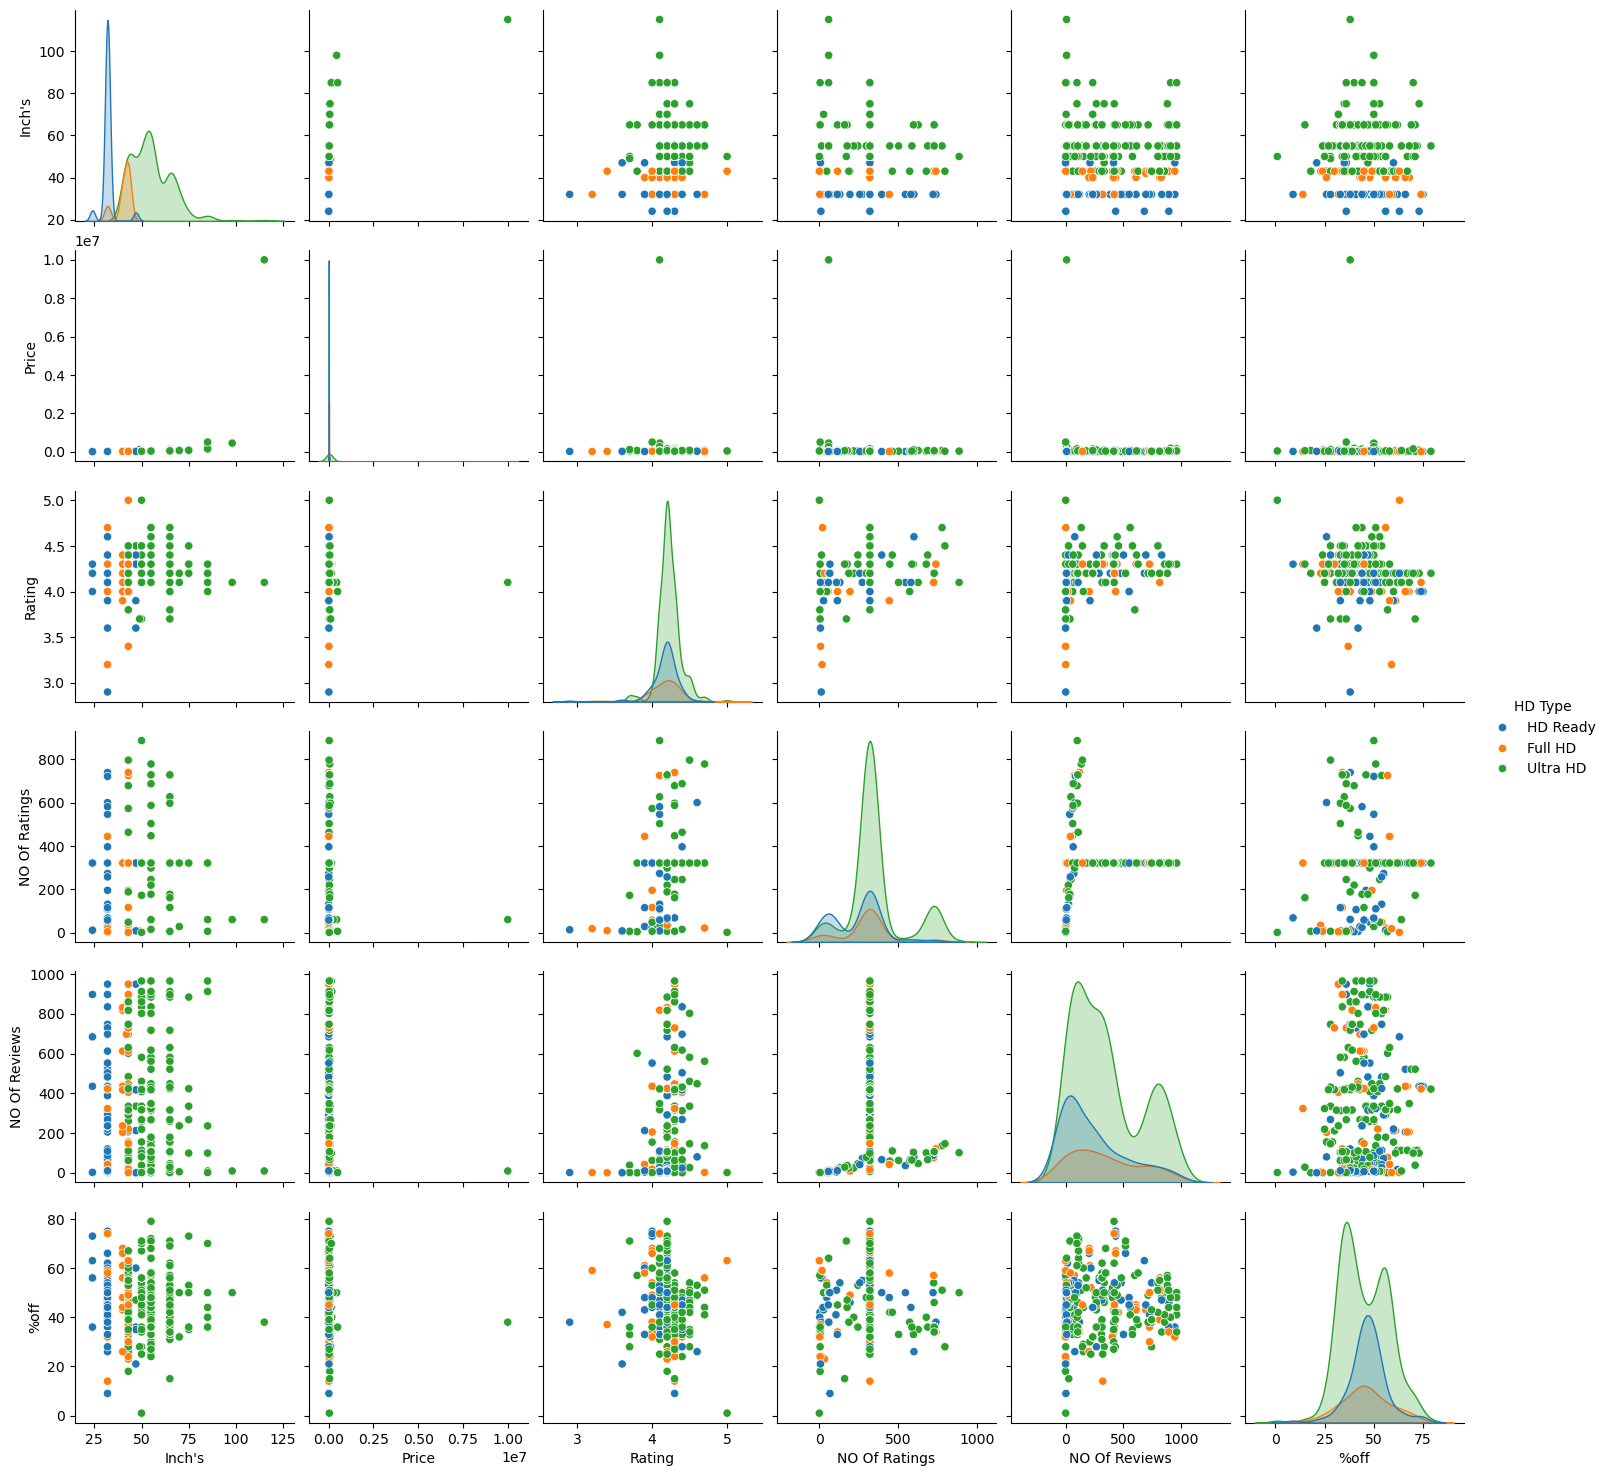

In [174]:
sns.pairplot(df,hue='HD Type')

([<matplotlib.patches.Wedge at 0x22de16eac00>,
 [Text(-0.47529433441489044, 0.9920157739033721, 'Ultra HD'),
  Text(0.05373476414817942, -1.0986867502258957, 'HD Ready'),
  Text(1.0140494688758843, -0.4262671400337317, 'Full HD')],
 [Text(-0.25925145513539477, 0.5410995130382029, '64.22%'),
  Text(0.029309871353552407, -0.5992836819413976, '23.11%'),
  Text(0.5531178921141187, -0.23250934910930815, '12.67%')])

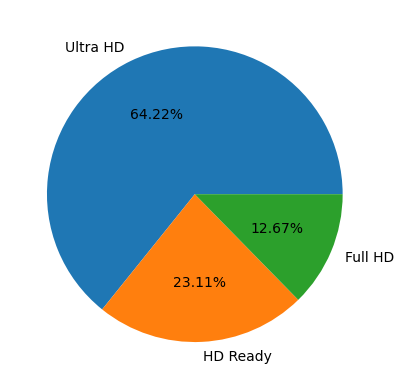

In [175]:
HD_valuecount=df["HD Type"].value_counts()
plt.pie(HD_valuecount,labels=HD_valuecount.index,autopct="%0.2f%%")

In [176]:
df.dtypes

Brand                object
Inch's                int32
Price                 int32
Rating              float64
NO Of Ratings         int32
NO Of Reviews         int32
HD Type              object
%off                  int32
Extra Offers         object
Operating System     object
dtype: object

In [180]:
df[["Inch's","Price","NO Of Ratings","NO Of Reviews","%off"]].corr()

Inch's     Price  NO Of Ratings  NO Of Reviews      %off
Inch's         1.000000  0.291617       0.219786      -0.023572 -0.136920
Price          0.291617  1.000000      -0.073361      -0.058535 -0.042525
NO Of Ratings  0.219786 -0.073361       1.000000       0.079516 -0.164775
NO Of Reviews -0.023572 -0.058535       0.079516       1.000000  0.069648
%off          -0.136920 -0.042525      -0.164775       0.069648  1.000000

In [182]:
corr=df.corr(numeric_only=True)

corr

Inch's     Price    Rating  NO Of Ratings  NO Of Reviews  \
Inch's         1.000000  0.291617  0.098008       0.219786      -0.023572   
Price          0.291617  1.000000 -0.028331      -0.073361      -0.058535   
Rating         0.098008 -0.028331  1.000000       0.205289       0.226198   
NO Of Ratings  0.219786 -0.073361  0.205289       1.000000       0.079516   
NO Of Reviews -0.023572 -0.058535  0.226198       0.079516       1.000000   
%off          -0.136920 -0.042525 -0.235703      -0.164775       0.069648   

                   %off  
Inch's        -0.136920  
Price         -0.042525  
Rating        -0.235703  
NO Of Ratings -0.164775  
NO Of Reviews  0.069648  
%off           1.000000

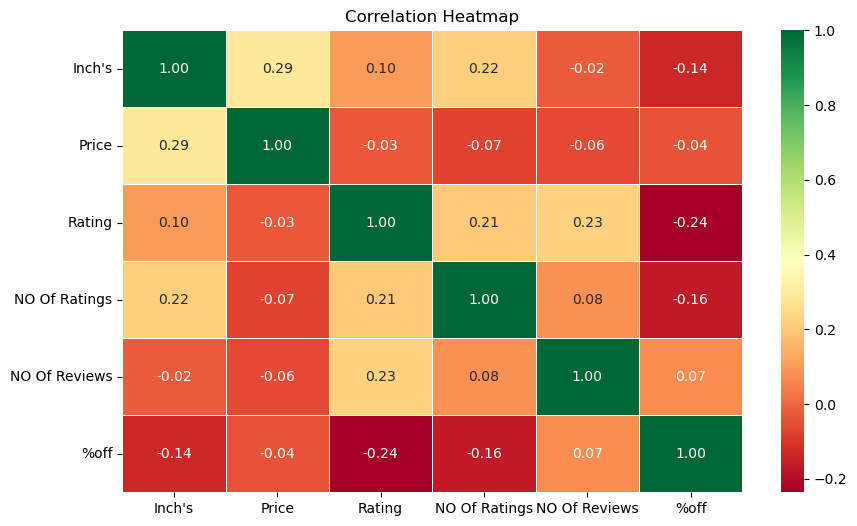

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Key Observations:

### Inch's vs Price (0.2916)

* Positive correlation, meaning larger TVs tend to be more expensive.
* However, it's not a very strong correlation (moderate relationship).
### Rating vs No Of Ratings (0.2053)

* Higher-rated TVs tend to have more ratings.
* This makes sense, as popular models often get more reviews.

### Rating vs %off (-0.2357)

* Negative correlation, meaning TVs with higher ratings tend to have lower discounts.
* High-rated TVs may not need big discounts to sell well.
* No Of Ratings vs No Of Reviews (0.0795)

* Weak correlation, but expected because more people rating a product often leads to more reviews.

### %off vs Price (-0.0425)

* Almost no correlation.
* Discounts don’t seem to depend on the TV's price.

### %off vs Rating (-0.2357)

* Higher-rated TVs tend to get lower discounts.
* Lower-rated TVs may need bigger discounts to attract buyers.

In [187]:
df.dtypes

Brand                object
Inch's                int32
Price                 int32
Rating              float64
NO Of Ratings         int32
NO Of Reviews         int32
HD Type              object
%off                  int32
Extra Offers         object
Operating System     object
dtype: object

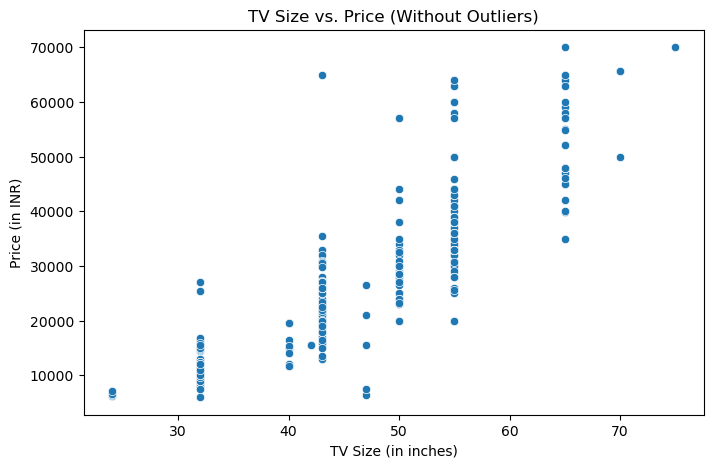

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df["Price"], 25)
Q3 = np.percentile(df["Price"], 75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

# Plot scatter plot without outliers
plt.figure(figsize=(8,5))
sns.scatterplot(x=filtered_df["Inch's"], y=filtered_df["Price"])

plt.xlabel("TV Size (in inches)")
plt.ylabel("Price (in INR)")
plt.title("TV Size vs. Price (Without Outliers)")

plt.show()


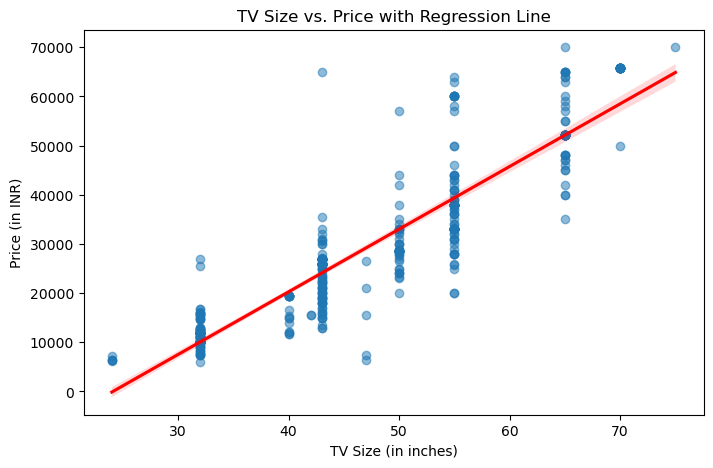

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Regression plot (scatter + regression line)
sns.regplot(x=filtered_df["Inch's"], y=filtered_df["Price"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

plt.xlabel("TV Size (in inches)")
plt.ylabel("Price (in INR)")
plt.title("TV Size vs. Price with Regression Line")

plt.show()


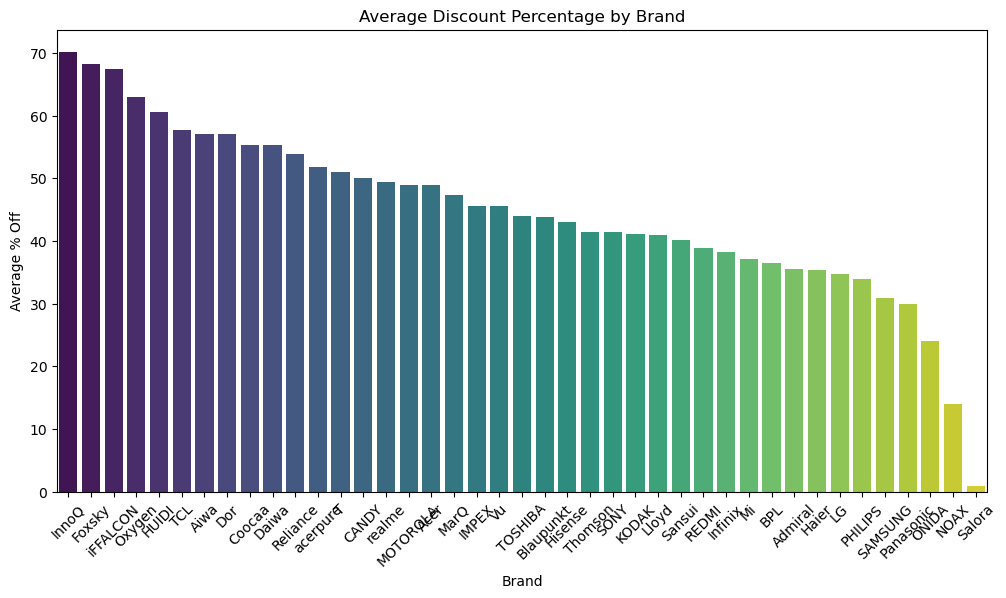

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

brand_discounts = df.groupby("Brand")["%off"].mean().reset_index()

brand_discounts = brand_discounts.sort_values(by="%off", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Brand", y="%off", data=brand_discounts, palette="viridis")

plt.xlabel("Brand")
plt.ylabel("Average % Off")
plt.title("Average Discount Percentage by Brand")
plt.xticks(rotation=45)  

plt.show()

In [195]:
df.dtypes

Brand                object
Inch's                int32
Price                 int32
Rating              float64
NO Of Ratings         int32
NO Of Reviews         int32
HD Type              object
%off                  int32
Extra Offers         object
Operating System     object
dtype: object

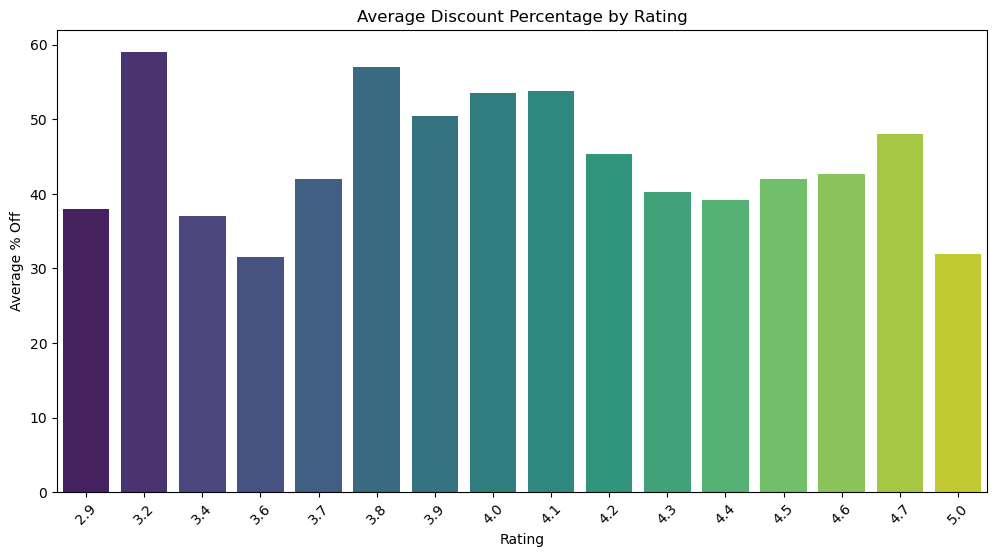

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

brand_discounts = df.groupby("Rating")["%off"].mean().reset_index()

brand_discounts = brand_discounts.sort_values(by="%off", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Rating", y="%off", data=brand_discounts, palette="viridis")

plt.xlabel("Rating")
plt.ylabel("Average % Off")
plt.title("Average Discount Percentage by Rating")
plt.xticks(rotation=45)  

plt.show()

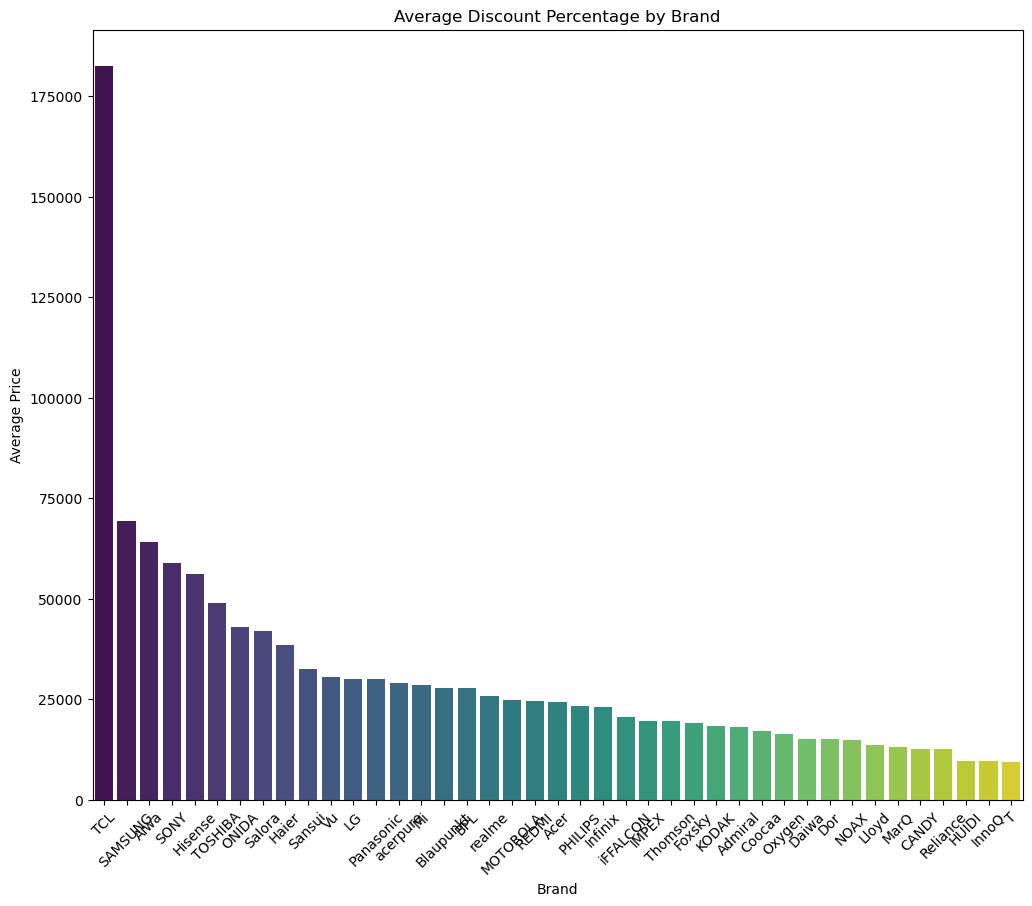

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Brand and calculate the average discount percentage
brand_discounts = df.groupby("Brand")["Price"].mean().reset_index()

# Sort brands by highest average discount
brand_discounts = brand_discounts.sort_values(by="Price", ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x="Brand", y="Price", data=brand_discounts, palette="viridis")

plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Average Discount Percentage by Brand")
plt.xticks(rotation=45)  # Rotate brand names for better readability

plt.show()

In [201]:
barplot_for_inches_price=df.groupby("Inch's")["Price"].sum()

barplot_for_inches_price

Inch's
24       32786
32     1217317
40      279093
42       30998
43     2419639
47       76886
49      110699
50     1405967
55     3412879
65     2851665
70     1166882
75      416986
85     1384866
98      449990
115    9999990
Name: Price, dtype: int32

<Axes: xlabel="Inch's">

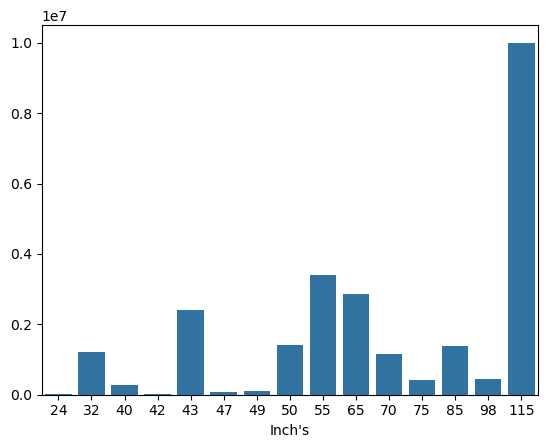

In [203]:
sns.barplot(x = barplot_for_inches_price.index, y = barplot_for_inches_price.values)

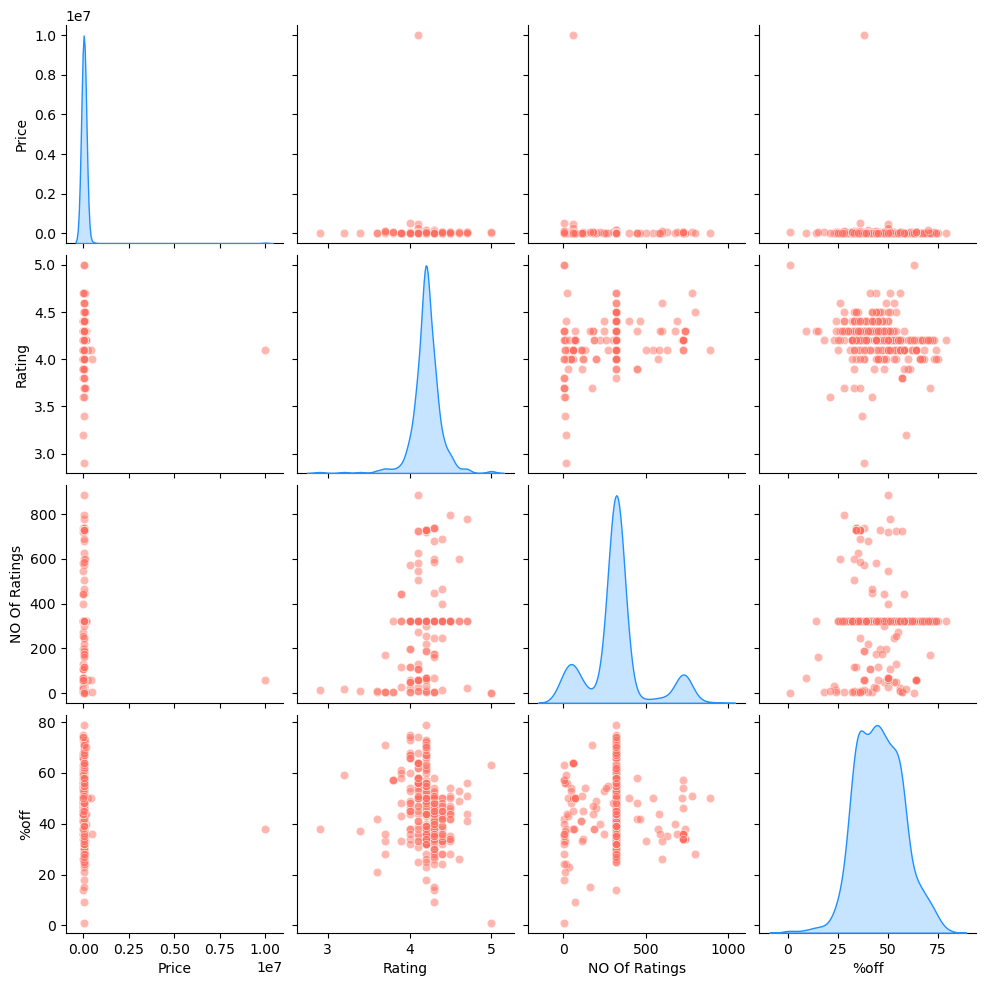

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant numerical columns
pairplot_data = df[["Price", "Rating", "NO Of Ratings", "%off"]]

# Define a custom color palette
custom_palette = "coolwarm"  # You can also use "viridis", "magma", "Set2", etc.

# Plot pairplot with new colors
sns.pairplot(pairplot_data, diag_kind="kde", plot_kws={'alpha': 0.5, 'color': '#FF6F61'},  # Change scatter color
             diag_kws={'color': '#1E90FF'})  # Change KDE color
             
plt.show()


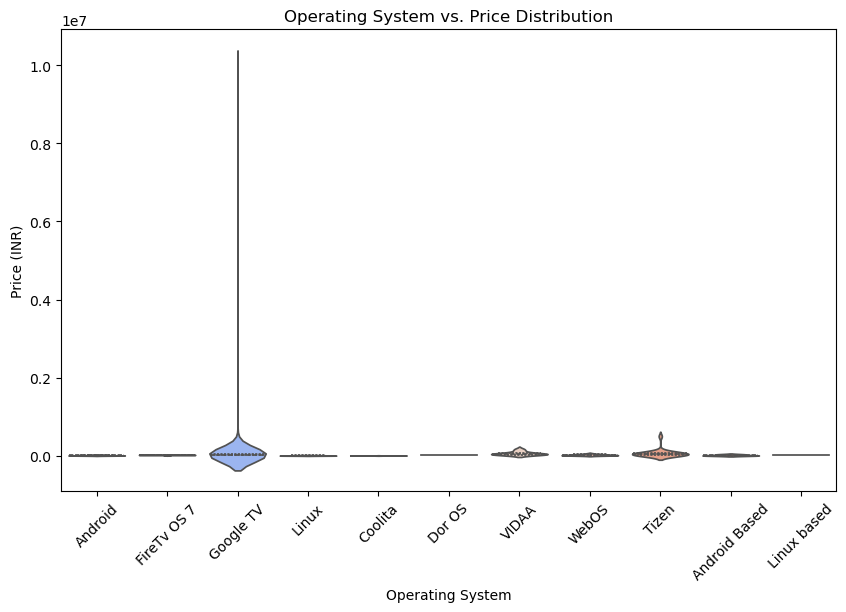

In [206]:
plt.figure(figsize=(10,6))

sns.violinplot(x=df["Operating System"], y=df["Price"], palette="coolwarm", inner="quartile")

plt.xlabel("Operating System")
plt.ylabel("Price (INR)")
plt.title("Operating System vs. Price Distribution")
plt.xticks(rotation=45)  

plt.show()


In [207]:
df.dtypes

Brand                object
Inch's                int32
Price                 int32
Rating              float64
NO Of Ratings         int32
NO Of Reviews         int32
HD Type              object
%off                  int32
Extra Offers         object
Operating System     object
dtype: object

In [211]:
df[["Inch's","Price","Rating"]].corr()

Inch's     Price    Rating
Inch's  1.000000  0.291617  0.098008
Price   0.291617  1.000000 -0.028331
Rating  0.098008 -0.028331  1.000000

In [213]:
df["HD Type"].value_counts()

HD Type
Ultra HD    289
HD Ready    104
Full HD      57
Name: count, dtype: int64

### In HD types 

* Ultra HD means 4k Quality

* HD Ready means 1080 Quality

* full HD means 720p Quality

### so now i am changing the `df["HD Types"]` to numaric column  for a better visulization

### In HD types 

* Ultra HD means 4k Quality ->RANK-1

* HD Ready means 1080 Quality ->RANK-2

* full HD means 720p Quality ->RANK-3

In [94]:
df["HD Type"] = df["HD Type"].replace({"Ultra HD":1,"HD Ready":2,"Full HD":3})


In [95]:
df["HD Type"]

0      2
1      3
2      2
3      2
4      2
      ..
451    1
452    3
453    2
454    1
455    1
Name: HD Type, Length: 450, dtype: int64

In [96]:
df["HD Type"].value_counts()

HD Type
1    289
2    104
3     57
Name: count, dtype: int64

In [97]:
print(df["HD Type"].unique())

[2 3 1]


In [98]:
a=df[["Inch's","Price","Rating","HD Type"]].corr()

df[["Inch's","Price","Rating","HD Type"]].corr()

Inch's     Price    Rating   HD Type
Inch's   1.000000  0.291617  0.098008 -0.590898
Price    0.291617  1.000000 -0.028331 -0.060315
Rating   0.098008 -0.028331  1.000000 -0.136706
HD Type -0.590898 -0.060315 -0.136706  1.000000

<Axes: >

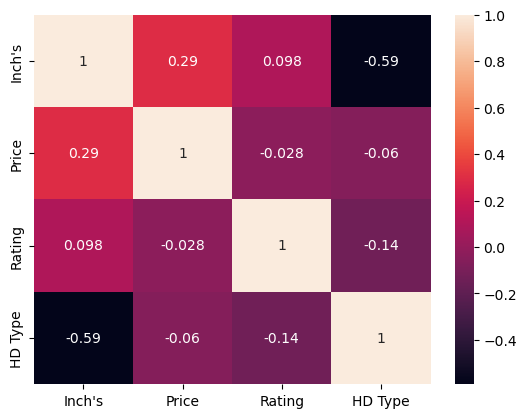

In [99]:
sns.heatmap(a,annot=True)

In [218]:
df.dtypes

Brand                object
Inch's                int32
Price                 int32
Rating              float64
NO Of Ratings         int32
NO Of Reviews         int32
HD Type              object
%off                  int32
Extra Offers         object
Operating System     object
dtype: object

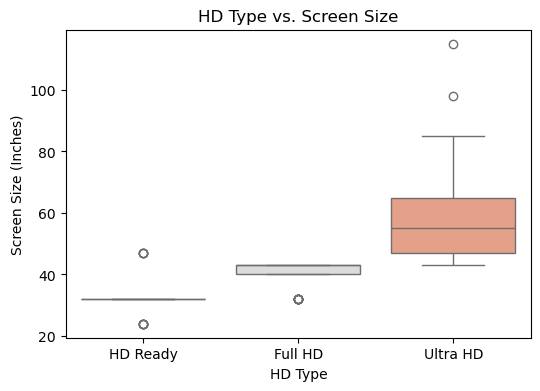

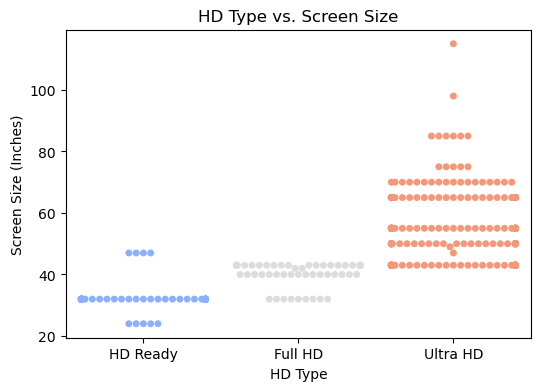

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Box Plot (HD Type vs. Inches)
plt.figure(figsize=(6, 4))
sns.boxplot(x='HD Type', y="Inch's", data=df, palette='coolwarm')
plt.title("HD Type vs. Screen Size")
plt.xlabel("HD Type")
plt.ylabel("Screen Size (Inches)")
plt.show()

# Swarm Plot (Alternative to Box Plot)
plt.figure(figsize=(6, 4))
sns.swarmplot(x='HD Type', y="Inch's", data=df, palette='coolwarm')
plt.title("HD Type vs. Screen Size")
plt.xlabel("HD Type")
plt.ylabel("Screen Size (Inches)")
plt.show()

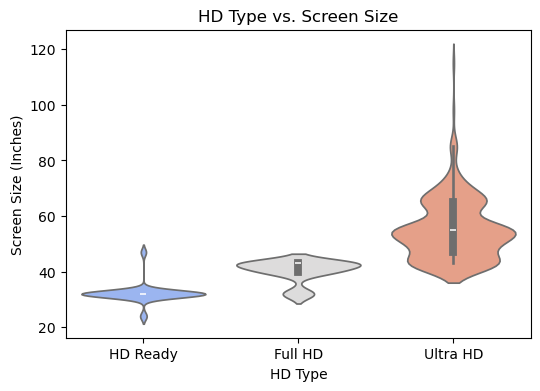

In [224]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='HD Type', y="Inch's", data=df, palette='coolwarm')
plt.title("HD Type vs. Screen Size")
plt.xlabel("HD Type")
plt.ylabel("Screen Size (Inches)")
plt.show()

In [102]:
df["Operating System"].head(20)

0         Android
1         Android
2     FireTv OS 7
3       Google TV
4         Android
5       Google TV
6           Linux
7           Linux
8         Android
9       Google TV
10      Google TV
11      Google TV
12      Google TV
13          Linux
14      Google TV
15      Google TV
16        Android
17        Android
18      Google TV
19        Coolita
Name: Operating System, dtype: object

In [104]:
df["Operating System"].value_counts()

Operating System
Google TV        291
Android           44
FireTv OS 7       22
Coolita           22
Tizen             21
WebOS             16
Linux             14
VIDAA             12
Android Based      6
Dor OS             1
Linux based        1
Name: count, dtype: int64

### Top-Tier (Best Experience & App Support)

#### 1️⃣ Google TV – (🏆 Best)

* Most advanced, AI-driven recommendations
* Best integration with Google Assistant & Chromecast
* Supports almost all streaming apps

#### 2️⃣ Android TV – (🚀 Excellent)

* Wide app support via Google Play Store
* Customizable, voice control with Google Assistant
* Good for sideloading apps

#### 3️⃣ Fire TV OS 7 – (🔥 Great for Amazon Ecosystem)

* Built-in Alexa voice control
* Best for Prime Video users
* Decent app store but ads can be annoying

### 👍 Mid-Tier (Decent Performance, But Limited Apps)

#### 4️⃣ Tizen (Samsung TVs) – (✨ Smooth & Reliable)

* Fast UI with good optimization
* Limited app selection (Samsung App Store)
* No Google Play Store

#### 5️⃣ WebOS (LG TVs) – (⚡ Fast & Simple)

* Intuitive UI with Magic Remote
* Great for LG smart features
* App support is improving but limited compared to Google TV

#### 6️⃣ VIDAA (Hisense TVs) – (👌 Basic but Functional)

* Good UI but limited app selection
*
* Optimized for Hisense TVs

### 🔽 Lower-Tier (Basic OS, Limited App Support)

#### 7️⃣ Linux Based OS (Basic Smart TVs) – (⚠️ Limited Features)

* Slower UI, fewer apps
* Mostly for basic streaming like YouTube & Netflix

#### 8️⃣ Coolita OS (Entry-Level TVs) – (📉 Very Basic)

* Designed for low-end smart TVs
* Very limited apps, slow UI

#### 9️⃣ Dor OS – (🤷 Least Known, Probably Limited)

* Not widely used, unknown app support
* Likely very basic

#### 10️⃣ Android-Based OS (Modified Android, Not True Android TV) – (🔍 Depends on Manufacturer)

* Can be buggy
* Some models allow sideloading apps, others don’t


🌟 Final Ratings (Best to Worst)

✅ 1. Google TV ⭐⭐⭐⭐⭐

✅ 2. Android TV ⭐⭐⭐⭐⭐

✅ 3. Fire TV OS 7 ⭐⭐⭐⭐☆

✅ 4. Tizen ⭐⭐⭐⭐☆

✅ 5. WebOS ⭐⭐⭐⭐☆

✅ 6. VIDAA ⭐⭐⭐☆☆

✅ 7. Linux ⭐⭐☆☆☆

✅ 8. Coolita ⭐⭐☆☆☆

✅ 9. Dor OS ⭐☆☆☆☆

✅ 10. Android-Based ⭐☆☆☆☆

In [230]:
df["Operating System"].value_counts()

Operating System
Google TV        291
Android           44
FireTv OS 7       22
Coolita           22
Tizen             21
WebOS             16
Linux             14
VIDAA             12
Android Based      6
Dor OS             1
Linux based        1
Name: count, dtype: int64

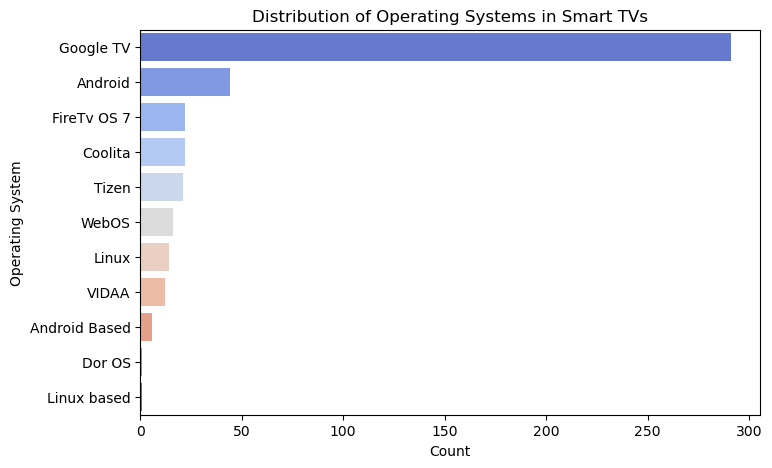

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df1 = df["Operating System"].value_counts().reset_index()
df1.columns = ["Operating System", "Count"]  # Rename columns for clarity

plt.figure(figsize=(8, 5))
sns.barplot(y="Operating System", x="Count", data=df1, palette="coolwarm")
plt.title("Distribution of Operating Systems in Smart TVs")
plt.xlabel("Count")
plt.ylabel("Operating System")
plt.show()



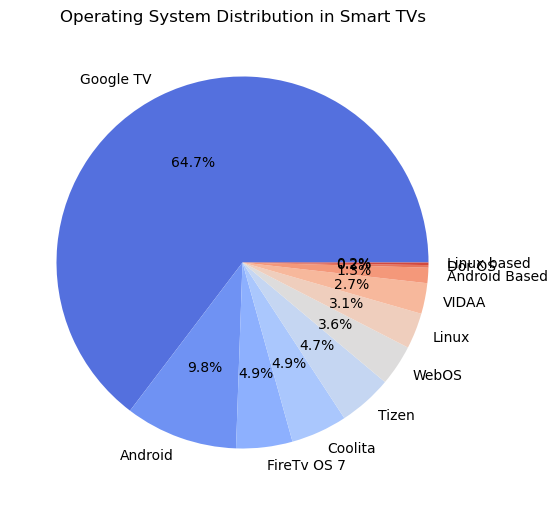

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Series to DataFrame
df1 = df["Operating System"].value_counts().reset_index()
df1.columns = ["Operating System", "Count"]

# Pie Chart
plt.figure(figsize=(6, 12))
plt.pie(df1["Count"], labels=df1["Operating System"], autopct='%1.1f%%',
        colors=sns.color_palette("coolwarm", len(df1)))
plt.title("Operating System Distribution in Smart TVs")
plt.show()


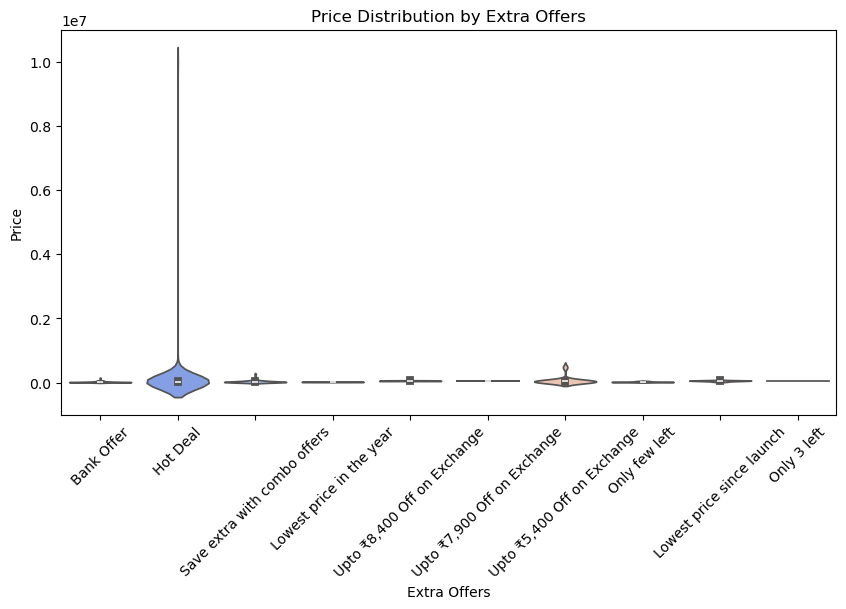

In [290]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="Extra Offers", y="Price", data=df, palette="coolwarm")
plt.title("Price Distribution by Extra Offers")
plt.xticks(rotation=45)
plt.show()

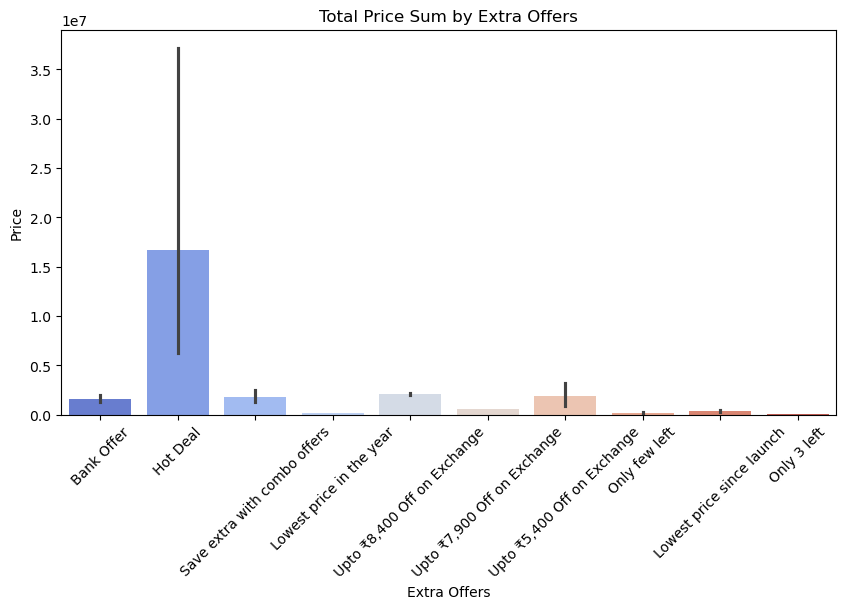

In [292]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Extra Offers", y="Price", data=df, palette="coolwarm", estimator=sum)
plt.title("Total Price Sum by Extra Offers")
plt.xticks(rotation=45)
plt.show()

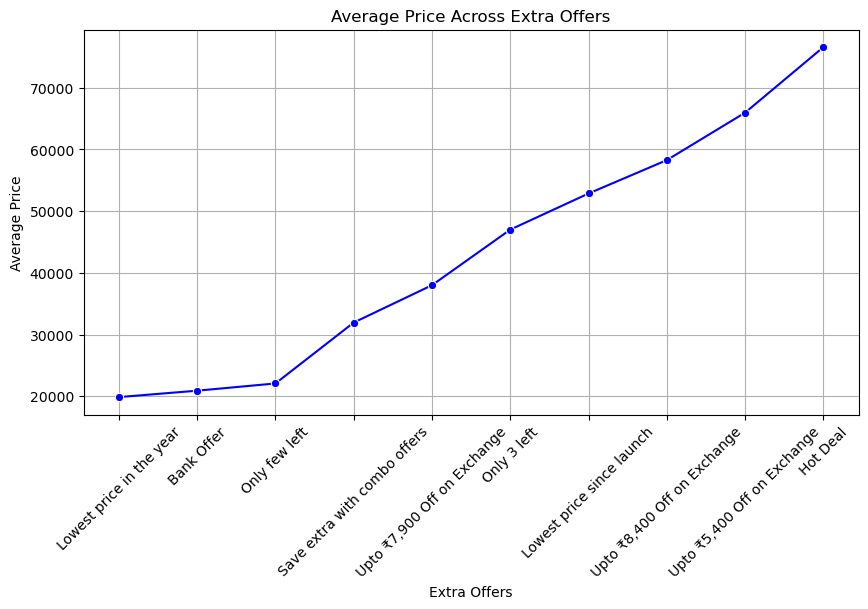

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_grouped = df.groupby("Extra Offers")["Price"].mean().reset_index()

df_grouped = df_grouped.sort_values(by="Price")

plt.figure(figsize=(10, 5))
sns.lineplot(x="Extra Offers", y="Price", data=df_grouped, marker="o", color="b", linestyle="-")

# Customizations
plt.title("Average Price Across Extra Offers")
plt.xlabel("Extra Offers")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

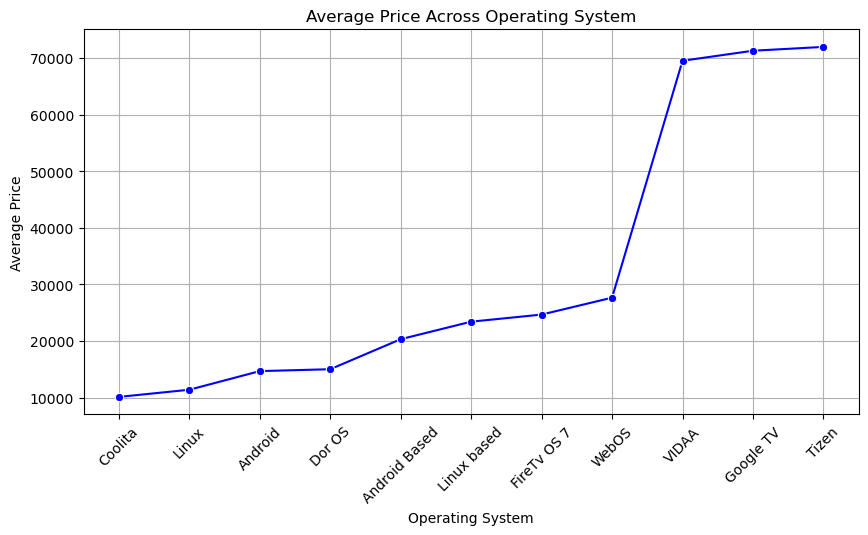

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_grouped = df.groupby("Operating System")["Price"].mean().reset_index()

df_grouped = df_grouped.sort_values(by="Price")

plt.figure(figsize=(10, 5))
sns.lineplot(x="Operating System", y="Price", data=df_grouped, marker="o", color="b", linestyle="-")

plt.title("Average Price Across Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

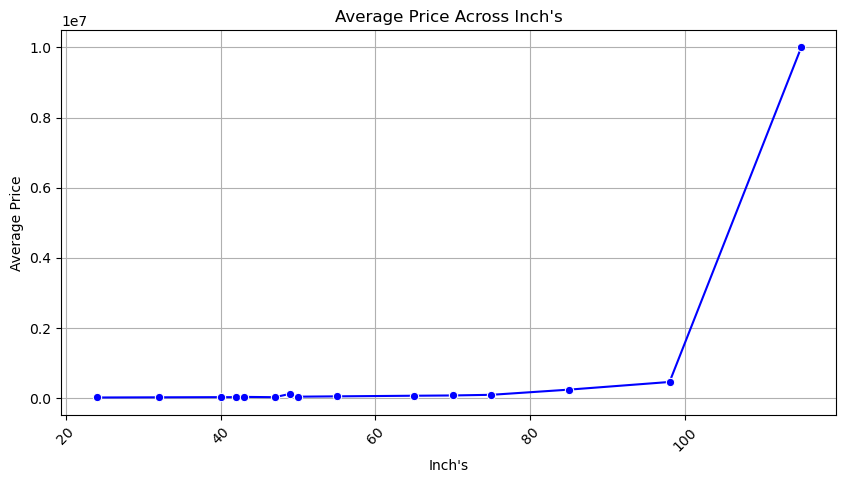

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_grouped = df.groupby("Inch's")["Price"].mean().reset_index()

df_grouped = df_grouped.sort_values(by="Price")

plt.figure(figsize=(10, 5))
sns.lineplot(x="Inch's", y="Price", data=df_grouped, marker="o", color="b", linestyle="-")

plt.title("Average Price Across Inch's")
plt.xlabel("Inch's")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()